<a href="https://colab.research.google.com/github/Palle-harshinireddy/AI_AgriYield_Predictor-PalleHarshiniReddy/blob/main/AgriYield_EDA_Preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# AgriYield Predictor — EDA & Preprocessing

This notebook loads the expanded dataset `AgriYield_Predictor_Dataset_expanded.xlsx`,
performs exploratory data analysis and preprocessing steps (missing values, encoding, scaling).
You can run this directly in Google Colab.

# Milestone 1 – Data Preprocessing and Exploratory Data Analysis (EDA)

The visualizations provide initial insights into the distribution of the target variable (Yield), the performance of different crops, and the relationships between key environmental factors and yield.

1. Distribution of Crop Yield
The histogram shows the overall distribution of the Yield [quintal/ha].

The yield distribution appears to be roughly bimodal or skewed, with peaks around 4.7 quintal/ha and 6.0 quintal/ha.
The overall yield ranges from approximately 4.0 to 8.0 quintal/ha.
2. Average Yield by Crop
This bar chart compares the mean yield for the different crops present in the dataset.

Sugarcane shows the highest average yield, at approximately 7.91 quintal/ha.
Soyabean and Wheat follow, with average yields around 7.17 and 6.0 quintal/ha, respectively.
Maize and Rice have the lowest average yields, indicating they may be more sensitive to the local conditions in this specific dataset.
3. Correlation Matrix of Numerical Features
The heatmap reveals the linear correlation coefficients between all numerical features. The key focus is on the Yield [quintal/ha] column:

Feature	Correlation with Yield	Interpretation
Nitrogen [kg/ha]	-0.02	Very weak negative correlation.
Potassium [kg/ha]	+0.29	Moderate positive correlation. Higher potassium tends to be associated with higher yield.
Phosphorus [kg/ha]	+0.21	Weak positive correlation.
Temp_Avg [celsius]	-0.13	Very weak negative correlation.
Rainfall [mm]	-0.18	Weak negative correlation.
Soil_pH	+0.32	Moderate positive correlation. Soil pH is the strongest positive predictor of yield among the primary numerical features.
4. Average Yield by Soil pH Group
This chart shows how average crop yield varies across different ranges of soil \text{pH}.

The highest average yield is observed in the most alkaline group, \text{pH} 8.0-8.5.
The lowest average yield occurs in the acidic range of \text{pH} 5.5-6.0.
This pattern supports the positive correlation observed in the heatmap, suggesting that slightly alkaline soil conditions favor high crop yield in this dataset.

## **Tools and Technologies Used**
Programming Language: Python

Libraries: Pandas, NumPy, Matplotlib, Seaborn

IDE/Editor: Google collab

Version Control: Git and GitHub

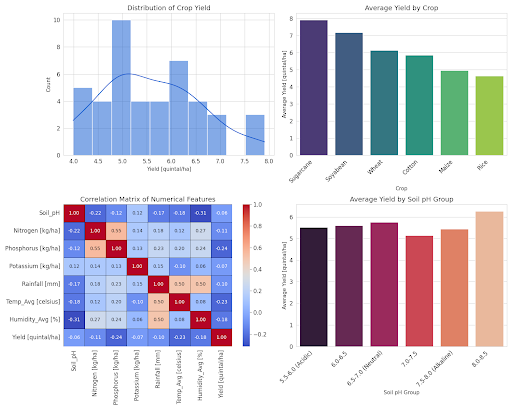

In [1]:
/content/AgriYield_Predictor_Dataset.xlsx

NameError: name 'content' is not defined

Here is Python code related to Preprocessing and EDA

In [ ]:
# ======================================
# 🌱 AgriYield Predictor – EDA & Preprocessing
# ======================================

# --- Step 1: Import Libraries ---
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split

# --- Step 2: Load Dataset ---
# (If running on Google Colab, upload your file manually or from Drive)
# from google.colab import drive
# drive.mount('/content/drive')
# df = pd.read_excel('/content/drive/MyDrive/AgriYield_Predictor_Dataset_expanded.xlsx')

df = pd.read_excel('AgriYield_Predictor_Dataset_expanded.xlsx')
print("✅ Dataset Loaded Successfully")
print("Shape:", df.shape)
print("Columns:", df.columns.tolist())

# --- Step 3: Basic EDA ---
print("\n--- First 5 Rows ---")
display(df.head())

print("\n--- Dataset Info ---")
df.info()

print("\n--- Statistical Summary ---")
display(df.describe())

# --- Step 4: Check for Missing Values ---
print("\n--- Missing Values ---")
display(df.isnull().sum())

# Visualize missing values
sns.heatmap(df.isnull(), cbar=False, cmap="viridis")
plt.title("Missing Values Heatmap")
plt.show()

# --- Step 5: Handle Missing Values ---
df.fillna(df.median(numeric_only=True), inplace=True)
df.fillna(df.mode().iloc[0], inplace=True)
print("\n✅ Missing values handled.")

# --- Step 6: Encode Categorical Columns ---
cat_cols = df.select_dtypes(include=['object']).columns
print("\nCategorical Columns:", cat_cols.tolist())

le = LabelEncoder()
for col in cat_cols:
    df[col] = le.fit_transform(df[col].astype(str))

print("✅ Categorical encoding done.")

# --- Step 7: Correlation Analysis ---
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()

# --- Step 8: Outlier Detection (Boxplots) ---
num_cols = df.select_dtypes(include=np.number).columns
plt.figure(figsize=(12, 6))
df[num_cols].boxplot()
plt.title("Numerical Feature Outlier Check")
plt.xticks(rotation=45)
plt.show()

# --- Step 9: Feature Scaling ---
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df[num_cols])
df[num_cols] = scaled_data
print("✅ Numerical features scaled.")

# --- Step 10: Split Dataset ---
# Assuming 'Yield' or similar is the target column
target_col = [col for col in df.columns if 'yield' in col.lower()]
if target_col:
    target_col = target_col[0]
    X = df.drop(columns=[target_col])
    y = df[target_col]
else:
    print("⚠️ Target column not detected, please specify manually.")
    X = df
    y = None

if y is not None:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    print("\n✅ Data Split Complete:")
    print("Train Shape:", X_train.shape)
    print("Test Shape:", X_test.shape)

print("\n--- Preprocessing Complete ---")

# --- Step 11: Save Processed Data ---
df.to_csv("Processed_Crop_Yield_Data.csv", index=False)
print("💾 Preprocessed dataset saved as 'Processed_Crop_Yield_Data.csv'")
